<a href="https://colab.research.google.com/github/cris-her/AI/blob/master/linear_regression_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import torch.nn as nn #relacion lineal 
import torch.optim as optim

import matplotlib.pyplot as plt

# **Regresión Lineal**

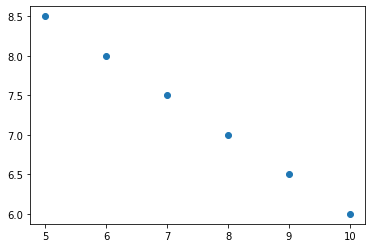

In [2]:
# Unidades vendidas e autos explicadas por los precios
car_prices = [5,6,7,8,9,10]
units_sold = [8.5, 8, 7.5, 7.0, 6.5, 6.0]

plt.scatter(car_prices, units_sold)

In [3]:
prices_array = np.array(car_prices).reshape(-1,1)
units_array = np.array(units_sold).reshape(-1,1)

print(prices_array)

type(prices_array)

[[ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


numpy.ndarray

In [4]:
prices = torch.from_numpy(prices_array).float().requires_grad_(True) 
# requires_grad_(True) #activa los gradientes en el tensor
units = torch.from_numpy(units_array).float()

prices, units.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

0.020843828096985817


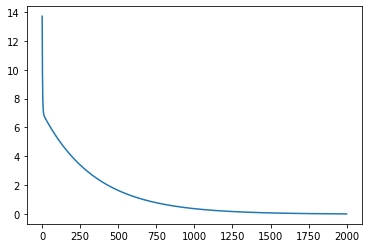

In [5]:
# Declaramos el modelo
model = nn.Linear(1,1)

# Definimos la funcion de perdida
loss_function = nn.MSELoss() 
#MSE media del cuadrado de los errores

# Declaramos el optimizador y learning rate
optimizer = optim.SGD(model.parameters(), lr=0.015) 
#lr = learning rate pasos

losses = []
iterations = 2000

# Escribimos el training loop

for i in range(iterations):
  # Por cada iteracion una prediccion
  #forwardpass
  pred = model(prices)
  loss = loss_function(pred, units)
  losses.append(loss.data)

  #backwardpass
  # reiniciamos los gradientes (pytorch los acumula siempre)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(float(loss))
plt.plot(range(iterations), losses)

In [6]:
# Una vez entrenado el modelo hagamos la prediccion
x = torch.Tensor([[4]])
p = model(x)
print(p)

tensor([[8.6802]], grad_fn=<AddmmBackward>)
